# [Multi-round inference](https://www.mackelab.org/sbi/tutorial/03_multiround_inference/)

In [4]:
import torch
from sbi.inference import SNPE, prepare_for_sbi
from sbi.utils.get_nn_models import posterior_nn
import sbi.utils as utils


Neural network successfully converged after 219 epochs.
Using SNPE-C with atomic loss



Neural network successfully converged after 74 epochs.



Posterior conditional density p(θ|x) (multi-round). Evaluates and samples by default at x=[[0.0, 0.0, 0.0]].

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


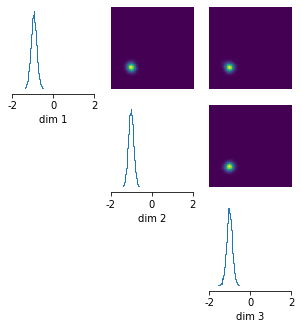

In [6]:
def linear_gaussian(theta):
    return theta + 1.0 + torch.randn_like(theta) * 0.1


num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), 
                         high=2*torch.ones(num_dim))

simulator, prior = prepare_for_sbi(linear_gaussian, prior)
inference = SNPE(simulator, prior)

# 2 rounds: first round simulates from the prior, 
# second round simulates from the obtained posterior.
num_rounds = 2
x_o = torch.zeros(3,)

posteriors = []
proposal = None

for _ in range(num_rounds):
    posterior = inference(num_simulations=500, proposal=proposal)
    posteriors.append(posterior)
    proposal = posterior.set_default_x(x_o)

posterior_samples = posterior.sample((10000,), x=x_o)

# plot posterior samples
_ = utils.pairplot(posterior_samples, limits=[[-2,2],[-2,2],[-2,2]], 
                   fig_size=(5,5))

print(posterior)
